In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# entropy vs p plots

In [73]:
table=pd.read_csv('table_entropy.csv')
table

,Rule,Class,"p=0, c=1 no translation","p=1, c=1 no translation","p=2, c=1 no translation","p=3, c=1 no translation","p=4, c=1 no translation","p=5, c=1 no translation","p=6, c=1 no translation","p=7, c=1 no translation",...,"p=2, c=3, right-2 translation","p=3, c=3, right-2 translation","p=4, c=3, right-2 translation","p=0, c=4, right-2 translation","p=1, c=4, right-2 translation","p=2, c=4, right-2 translation","p=3, c=4, right-2 translation","p=0, c=5, right-2 translation","p=1, c=5, right-2 translation","p=2, c=5, right-2 translation"
0,0,1,2.220446e-16,0.693147,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,...,6.931472e-01,6.931472e-01,6.931472e-01,-8.881784e-16,6.931472e-01,6.931472e-01,6.931472e-01,5.995204e-15,6.931472e-01,6.931472e-01
1,1,2,-1.322436e+01,-14.048539,-1.412084e+01,-1.287871e+01,-1.224844e+01,-1.300055e+01,-1.171553e+01,-1.226735e+01,...,-9.505530e+00,-1.554312e-15,-9.073461e+00,3.552714e-15,6.093779e-01,6.093779e-01,6.093779e-01,2.664535e-15,2.220446e-15,-1.110223e-15
2,2,2,0.000000e+00,0.481212,4.812118e-01,4.812118e-01,4.812118e-01,4.812118e-01,4.812118e-01,4.812118e-01,...,4.812118e-01,4.812118e-01,4.812118e-01,6.661338e-16,4.812118e-01,4.812118e-01,4.812118e-01,1.110223e-15,4.812118e-01,4.812118e-01
3,3,2,-inf,-39.592842,-2.290786e+01,-1.915030e+01,-2.187116e+01,-1.897310e+01,-2.051386e+01,-2.184961e+01,...,-1.233707e+01,-1.309559e+01,-1.222935e+01,5.623991e-01,6.931472e-01,6.931472e-01,6.931472e-01,-1.210557e+01,-1.336369e+01,-1.619634e+01
4,4,2,4.812118e-01,0.693147,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,...,5.623991e-01,5.623991e-01,5.623991e-01,2.220446e-16,5.623991e-01,5.623991e-01,5.623991e-01,2.220446e-16,5.623991e-01,5.623991e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,178,2,0.000000e+00,0.000000,1.110223e-15,2.220446e-16,6.661338e-16,-1.110223e-16,2.220446e-16,0.000000e+00,...,4.511694e-01,-4.440892e-16,4.774325e-01,8.881784e-16,3.822451e-01,4.511694e-01,4.708454e-01,1.332268e-15,3.822451e-01,8.881784e-16
76,184,2,6.971369e-09,0.000000,9.560761e-09,0.000000e+00,1.268336e-08,-2.664535e-15,2.220446e-16,2.421365e-08,...,3.465736e-01,1.386294e-01,4.496806e-01,2.094439e-08,2.406059e-01,3.465736e-01,4.084360e-01,2.920712e-08,2.406059e-01,2.299197e-01
77,200,1,5.623991e-01,0.693147,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,...,4.812118e-01,4.812118e-01,4.812118e-01,1.110223e-15,4.812118e-01,4.812118e-01,4.812118e-01,-4.440892e-16,4.812118e-01,4.812118e-01
78,204,2,6.931472e-01,0.693147,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,...,-1.110223e-16,6.661338e-16,4.440892e-16,0.000000e+00,6.661338e-16,6.661338e-16,-4.440892e-16,6.661338e-16,8.881784e-16,-4.440892e-16


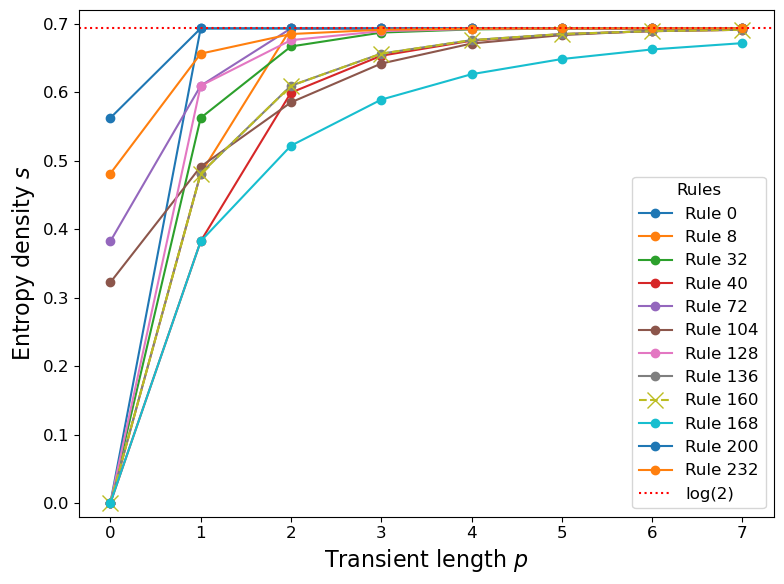

In [74]:
# Class 1 all rules vs p
class_1 = [0, 8, 32, 40, 72, 104, 128, 136, 160, 168, 200, 232]
max_p = 8
c=1

plt.figure(figsize=(8, 6))  # Make the figure a bit larger
plt.rcParams.update({'font.size': 12})  # Increase font size

for rule in class_1:
    rule_df = table[table['Rule'] == rule]
    entropy = []
    for p in range(max_p):
        value = float(rule_df[f'p={p}, c={c} no translation'].iloc[0])
        entropy.append(value)
    if rule==160:
        plt.plot(np.arange(max_p), entropy, marker='x', linestyle='--', label=f'Rule {rule}', markersize=12)
    else:
        plt.plot(np.arange(max_p), entropy, marker='.', label=f'Rule {rule}', markersize=12)

plt.axhline(np.log(2), color='red', linestyle=':', label='log(2)')

plt.xlabel(r'Transient length $p$', fontsize=16)
plt.ylabel(r'Entropy density $s$', fontsize=16)
plt.xticks(np.arange(0, max_p, 1))  # ticks at 0,1,2,...max_p
#plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.ylim(-0.02, 0.72) 

plt.legend(title='Rules', fontsize=12)      
plt.tight_layout()
plt.savefig('figures/class_1_entropy_vs_p.pdf', dpi=300, bbox_inches='tight')
plt.show();


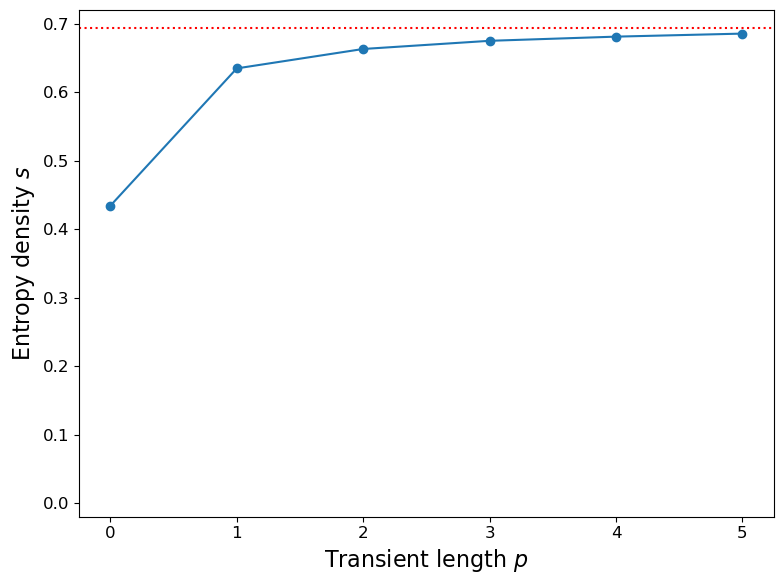

In [75]:
# Class 2 rule 6
rule=6
max_p = 6
c=2

plt.figure(figsize=(8, 6))  # Make the figure a bit larger
plt.rcParams.update({'font.size': 12})  # Increase font size

rule_df = table[table['Rule'] == rule]
entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, left translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='.', markersize=12)

plt.axhline(np.log(2), color='red', linestyle=':', label='log(2)')

plt.xlabel(r'Transient length $p$', fontsize=16)
plt.ylabel(r'Entropy density $s$', fontsize=16)
plt.xticks(np.arange(0, max_p, 1))  # ticks at 0,1,2,...max_p

plt.ylim(-0.02, 0.72) 
#plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.tight_layout()
plt.savefig('figures/rule_6_entropy_vs_p.pdf', dpi=300, bbox_inches='tight')
plt.show();


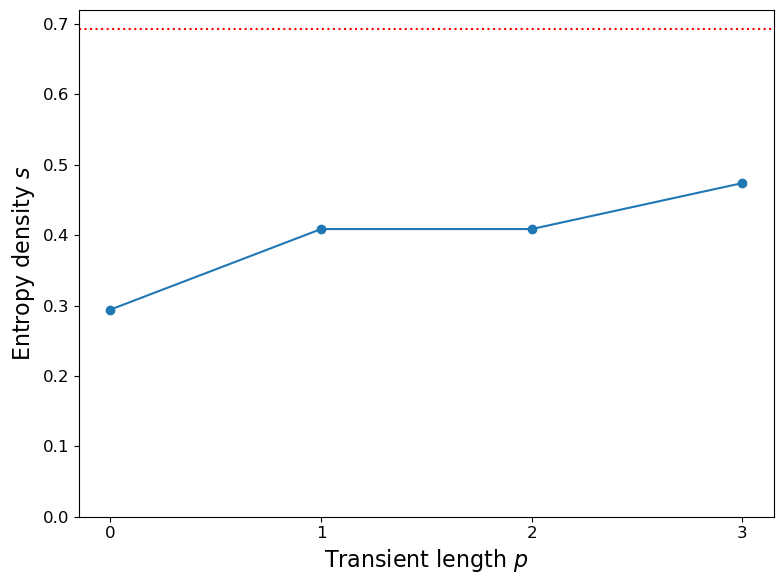

In [76]:
# Class 2 rule 41
rule=41
max_p = 4
c=4

plt.figure(figsize=(8, 6))  # Make the figure a bit larger
plt.rcParams.update({'font.size': 12})  # Increase font size

rule_df = table[table['Rule'] == rule]
entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, right translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='.', markersize=12)

plt.axhline(np.log(2), color='red', linestyle=':', label='log(2)')

plt.xlabel(r'Transient length $p$', fontsize=16)
plt.ylabel(r'Entropy density $s$', fontsize=16)
plt.xticks(np.arange(0, max_p, 1))  # ticks at 0,1,2,...max_p

plt.ylim(-0.02, 0.72)  # Set y-axis limits to 0 and 1.1
plt.ylim(0, 0.72)  # Set y-axis limits to 0 and 1.1
plt.tight_layout()
plt.savefig('figures/rule_41_entropy_vs_p.pdf', dpi=300, bbox_inches='tight')
plt.show();


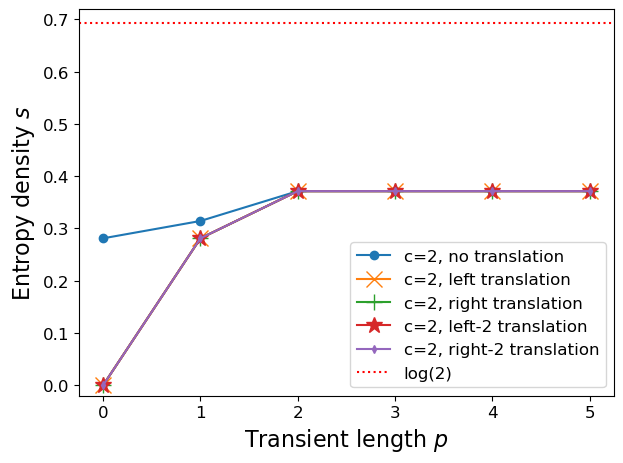

In [77]:
# Entropy as function of  for different neighborhoods, rule 146
rule=146
max_p = 6
c=2 # Change to 2

rule_df = table[table['Rule'] == rule]
entropies=rule_df.to_numpy()[0]
entropy = []

plt.rcParams.update({'font.size': 12})  # Increase font size
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c} no translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='.', label=f'c={c}, no translation', markersize=12)

entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, left translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='x', label=f'c={c}, left translation', markersize=12)

entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, right translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='+', label=f'c={c}, right translation',markersize=12)


entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, left-2 translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='*', label=f'c={c}, left-2 translation',markersize=12)

entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, right-2 translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='d', label=f'c={c}, right-2 translation',markersize=4)



plt.axhline(np.log(2), color='red', linestyle=':', label='log(2)')

plt.xlabel(r'Transient length $p$', fontsize=16)
plt.ylabel(r'Entropy density $s$', fontsize=16)
plt.xticks(np.arange(0, max_p, 1))  # ticks at 0,1,2,...max_p
#plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(-0.02, 0.72)  # Set y-axis limits to 0 and 1.1 
plt.legend(fontsize=12)      
plt.tight_layout()
plt.savefig('figures/rule_146_entropy_vs_p.pdf', dpi=300, bbox_inches='tight')
plt.show();

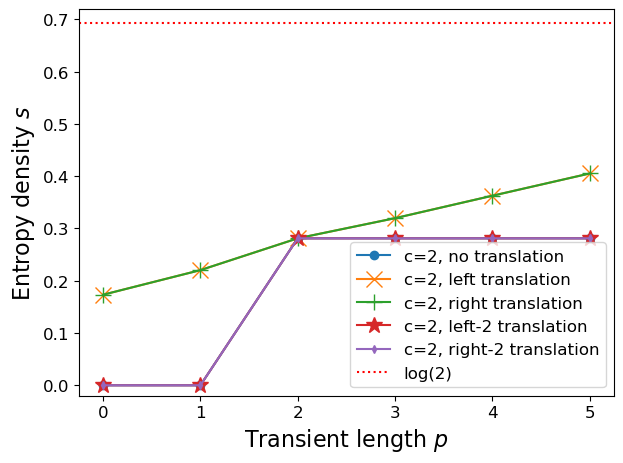

In [78]:
# Entropy as function of  for different neighborhoods, rule 54
rule=54
max_p = 6
c=2

rule_df = table[table['Rule'] == rule]
entropy = []

plt.rcParams.update({'font.size': 12})  # Increase font size
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c} no translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='.', label=f'c={c}, no translation', markersize=12)

entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, left translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='x', label=f'c={c}, left translation', markersize=12)

entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, right translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='+', label=f'c={c}, right translation',markersize=12)


entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, left-2 translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='*', label=f'c={c}, left-2 translation',markersize=12)

entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, right-2 translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='d', label=f'c={c}, right-2 translation',markersize=4)


plt.axhline(np.log(2), color='red', linestyle=':', label='log(2)')

plt.xlabel(r'Transient length $p$', fontsize=16)
plt.ylabel(r'Entropy density $s$', fontsize=16)
plt.xticks(np.arange(0, max_p, 1))  # ticks at 0,1,2,...max_p
#plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(-0.02, 0.72)  # Set y-axis limits to 0 and 1.1 
plt.legend(fontsize=12)      
plt.tight_layout()
plt.savefig('figures/rule_54_entropy_vs_p.pdf', dpi=300, bbox_inches='tight')
plt.show();


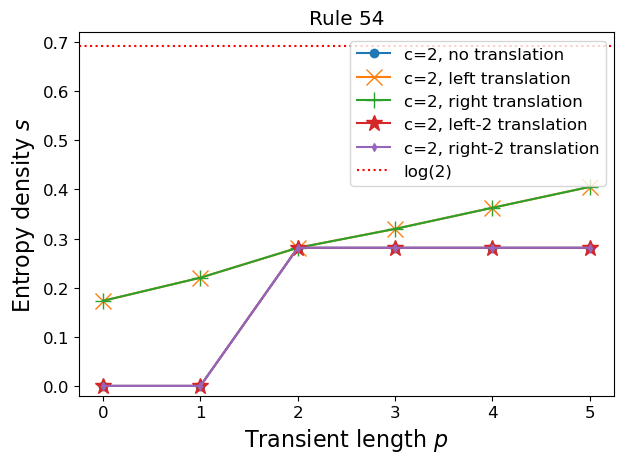

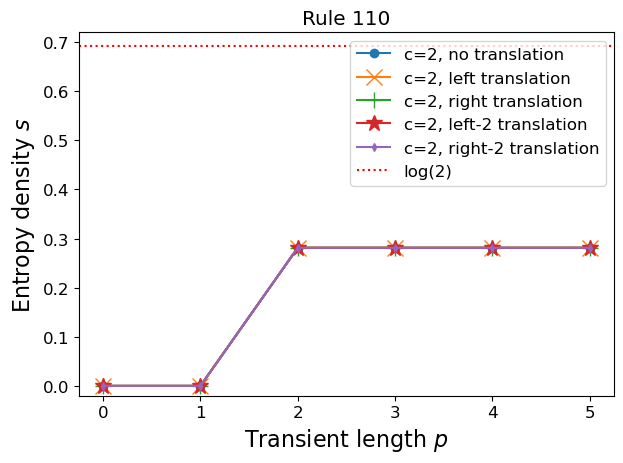

In [79]:
# Entropy as function of  for different neighborhoods for all rules in class 3 and 4
class_3=[18, 22, 30, 45, 60, 90, 105, 122, 126, 146, 150]
class_4=[54, 106, 110]

max_p = 6
c=2

for rule in class_4:
    rule_df = table[table['Rule'] == rule]
    try:
        entropies=rule_df.to_numpy()[0]
    except:
        continue
    entropy = []

    plt.rcParams.update({'font.size': 12})  # Increase font size
    for p in range(max_p):
        value = float(rule_df[f'p={p}, c={c} no translation'].iloc[0])
        entropy.append(value)
    plt.plot(np.arange(max_p), entropy, marker='.', label=f'c={c}, no translation', markersize=12)

    entropy = []
    for p in range(max_p):
        value = float(rule_df[f'p={p}, c={c}, left translation'].iloc[0])
        entropy.append(value)
    plt.plot(np.arange(max_p), entropy, marker='x', label=f'c={c}, left translation', markersize=12)

    entropy = []
    for p in range(max_p):
        value = float(rule_df[f'p={p}, c={c}, right translation'].iloc[0])
        entropy.append(value)
    plt.plot(np.arange(max_p), entropy, marker='+', label=f'c={c}, right translation',markersize=12)

    
    entropy = []
    for p in range(max_p):
        value = float(rule_df[f'p={p}, c={c}, left-2 translation'].iloc[0])
        entropy.append(value)
    plt.plot(np.arange(max_p), entropy, marker='*', label=f'c={c}, left-2 translation',markersize=12)

    entropy = []
    for p in range(max_p):
        value = float(rule_df[f'p={p}, c={c}, right-2 translation'].iloc[0])
        entropy.append(value)
    plt.plot(np.arange(max_p), entropy, marker='d', label=f'c={c}, right-2 translation',markersize=4)
    


    plt.axhline(np.log(2), color='red', linestyle=':', label='log(2)')

    plt.xlabel(r'Transient length $p$', fontsize=16)
    plt.ylabel(r'Entropy density $s$', fontsize=16)
    plt.title(f'Rule {rule}')
    plt.xticks(np.arange(0, max_p, 1))  # ticks at 0,1,2,...max_p
    #plt.yticks(np.arange(0, 1.1, 0.1))
    plt.ylim(-0.02, 0.72)  # Set y-axis limits to 0 and 1.1 
    plt.legend(fontsize=12)      
    plt.tight_layout()
    plt.show();


# Maximal entropy plot

Rule 154 not found in the table.
Rule 30 not found in the table.
Rule 45 not found in the table.
Rule 60 not found in the table.
Rule 90 not found in the table.
Rule 105 not found in the table.
Rule 150 not found in the table.
Rule 106 not found in the table.


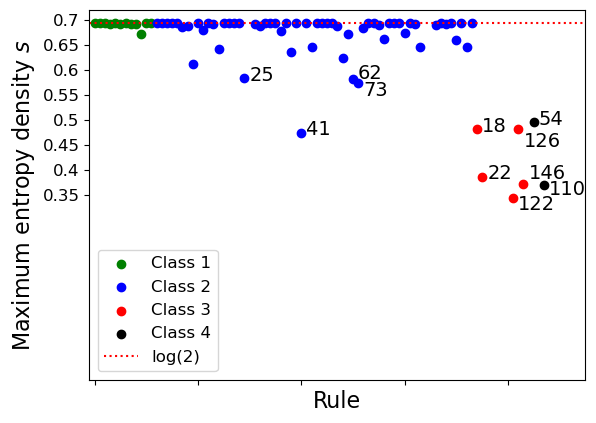

In [144]:
# max entropy all rules
class_1 = [0, 8, 32, 40, 72, 104, 128, 136, 160, 168, 200, 232]
class_2 = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 19, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 46, 50, 51, 56, 57, 58, 62, 73, 74, 76, 77, 78, 94, 108, 130, 132, 134, 138, 140, 142, 152, 154, 156, 162, 164, 170, 172, 178, 184, 204]
class_3=[18, 22, 30, 45, 60, 90, 105, 122, 126, 146, 150]
class_4=[54, 106, 110]
all_rules = class_1 + class_2 + class_3 + class_4
fig, ax=plt.subplots()
first_class1=True
first_class2=True
first_class3=True
first_class4=True


plt.rcParams.update({'font.size': 12})  # Increase font size

for idx, rule in enumerate(all_rules):
    rule_df = table[table['Rule'] == rule]
    try:
        entropies=rule_df.to_numpy()[0]
    except:
        print(f"Rule {rule} not found in the table.")
        continue
    if entropies[1] == 1:
        ax.scatter(idx, np.maximum(np.max(entropies[2:]),-0.1), color='green', label='Class 1' if first_class1 else "")
        first_class1=False
    elif entropies[1] == 2:
        ax.scatter(idx, np.maximum(np.max(entropies[2:]),-0.1), color='blue', label='Class 2' if first_class2 else "")
        if np.maximum(np.max(entropies[2:]), -0.1)<0.6:
            ax.text(x=idx+1, y=np.maximum(np.max(entropies[2:]), -0.1)-0.005+0.005*(rule==62)-0.02*(rule==73), s=f'{rule}', fontsize=14)
        first_class2=False
    elif entropies[1] == 3:
        ax.scatter(idx, np.maximum(np.max(entropies[2:]), -0.1), color='red', label='Class 3' if first_class3 else "")
        if np.maximum(np.max(entropies[2:]), -0.1)>0.3:
            ax.text(x=idx+1, y=np.maximum(np.max(entropies[2:]), -0.1)-0.005-0.02*(rule==122)-0.03*(rule==126)+0.015*(rule==146), s=f'{rule}', fontsize=14)
        first_class3=False
    elif entropies[1] == 4:
        ax.scatter(idx, np.maximum(np.max(entropies[2:]),-0.1), color='black', label='Class 4' if first_class4 else "")
        if np.maximum(np.max(entropies[2:]), -0.1)>0.2:
            ax.text(x=idx+1, y=np.maximum(np.max(entropies[2:]), -0.1)-0.005-0.015*(rule==110), s=f'{rule}', fontsize=14)
        first_class4=False

plt.axhline(np.log(2), color='red', linestyle=':', label='log(2)')
ax.legend(fontsize=12)
ax.set_xlabel('Rule', fontsize=16)
ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)

yticks = ax.get_yticks()
# Create new labels (change the one you want)
new_labels = [f"{np.round(y,2)}" if y != -0.1 else r"$s<0$" for y in yticks]
new_labels[0]=''
new_labels[-1]=''
# Set new tick labels
ax.set_yticks(yticks[1:-1])
ax.set_yticklabels(new_labels[1:-1])
plt.ylim(-0.02, 0.72)  # Set y-axis limits to 0 and 1.1 
plt.xlim(-1, len(all_rules)+7)  # Set x-axis limits to 0 and 1.1

ax.set_ylabel(r'Maximum entropy density $s$', fontsize=16);


# Maximal entropy table

In [81]:
# TODO: create latex table
class_1 = [0, 8, 32, 40, 72, 104, 128, 136, 160, 168, 200, 232]
class_2 = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 19, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 46, 50, 51, 56, 57, 58, 62, 73, 74, 76, 77, 78, 94, 108, 130, 132, 134, 138, 140, 142, 152, 154, 156, 162, 164, 170, 172, 178, 184, 204]
class_3=[18, 22, 30, 45, 60, 90, 105, 122, 126, 146, 150]
class_4=[54, 106, 110]
all_rules = class_1 + class_2 + class_3 + class_4
all_rules.sort()

table_list=[]

for idx, rule in enumerate(all_rules):
    try:
        rule_df = table[table['Rule'] == rule]
        entropies=rule_df.to_numpy()[0]
        max_entropy=np.max(entropies[2:])
        idx_max_entropy=np.argmax(entropies[2:])
        table_list.append([rule, int(entropies[1]), np.round(entropies[2],3), np.round(max_entropy,3), table.columns[2+idx_max_entropy]])
    except:
        print(f"Rule {rule} not found in the table.")
        continue

for row in table_list:
    row[4] = row[4].replace("translation", "tr.")
for row in table_list:
    row[4] = row[4].replace("left tr.", "left-tr.")
for row in table_list:
    row[4] = row[4].replace("right tr.", "right-tr.")

# Create DataFrame
df = pd.DataFrame(table_list, columns=[
    'Rule', 'Class', 'p=0, c=1', 'max $s$', 'p,c, neighborhood'
])

# Replace -inf with LaTeX string before rounding
df['p=0, c=1'] = df['p=0, c=1'].replace(-np.inf, r'$-\infty$')

# Round numeric columns (except where we already replaced with LaTeX)
numeric_cols = ['p=0, c=1', 'max $s$']
df[numeric_cols[1]] = df[numeric_cols[1]].astype(float).round(3)

roman_map = {1: 'I', 2: 'II', 3: 'III', 4: 'IV'} 
df['Class'] = df['Class'].replace(roman_map)

# Convert to LaTeX
latex_code = df.to_latex(index=False, escape=False, float_format="%.3f")

# Print LaTeX code
print(latex_code)


Rule 30 not found in the table.
Rule 45 not found in the table.
Rule 60 not found in the table.
Rule 90 not found in the table.
Rule 105 not found in the table.
Rule 106 not found in the table.
Rule 150 not found in the table.
Rule 154 not found in the table.
\begin{tabular}{rllrl}
\toprule
Rule & Class & p=0, c=1 & max $s$ & p,c, neighborhood \\
\midrule
0 & I & 0.000 & 0.693 & p=2, c=5, right-tr. \\
1 & II & -13.224 & 0.693 & p=5, c=2 no tr. \\
2 & II & 0.000 & 0.693 & p=1, c=1, left-tr. \\
3 & II & $-\infty$ & 0.693 & p=3, c=4, right-2 tr. \\
4 & II & 0.481 & 0.693 & p=2, c=5 no tr. \\
5 & II & 0.281 & 0.693 & p=1, c=2 no tr. \\
6 & II & 0.000 & 0.686 & p=5, c=2, left-tr. \\
7 & II & 0.000 & 0.687 & p=5, c=2, right-2 tr. \\
8 & I & -0.000 & 0.693 & p=6, c=1, right-2 tr. \\
9 & II & -9.241 & 0.612 & p=5, c=2, right-tr. \\
10 & II & -0.000 & 0.693 & p=1, c=1, left-2 tr. \\
11 & II & -14.338 & 0.680 & p=5, c=2, right-tr. \\
12 & II & 0.481 & 0.693 & p=6, c=2 no tr. \\
13 & II & 0.281 &

# s vs rho plot

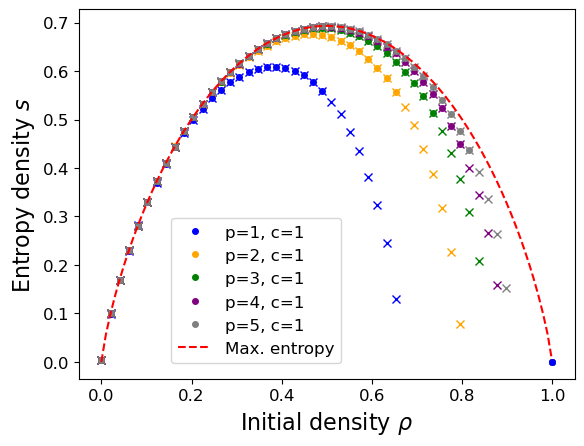

In [82]:
s_vs_rho=pd.read_csv('s_given_rho_rule_128.csv')
s_vs_rho_ending_all_0=pd.read_csv('s_given_rho_rule_128_ending_all_0.csv')
# Extract the densities (column headers)
colors = ['blue', 'orange', 'green', 'purple', 'gray']
densities = s_vs_rho.columns[1:].to_numpy().astype(float)

plt.rcParams.update({'font.size': 12})  # Increase font size

for idx, label in enumerate(s_vs_rho['Unnamed: 0'].to_list()):
    plt.plot(densities, s_vs_rho.iloc[idx, 1:], label=label+', c=1', color=colors[idx], marker='o', linestyle='', markersize=4)
    plt.plot(densities, s_vs_rho_ending_all_0.iloc[idx, 1:], color=colors[idx], marker='x', linestyle='', markersize=6)    
plt.plot(np.linspace(0,1,100), np.log(1/(np.linspace(0,1,100)**np.linspace(0,1,100)*(1-np.linspace(0,1,100))**(1-np.linspace(0,1,100)))), color='r', linestyle='--', label='Max. entropy')
plt.plot(1,0, marker='o', color=colors[0], markersize=4)
plt.xlabel(r'Initial density $\rho$', fontsize=16)
plt.ylabel(r'Entropy density $s$', fontsize=16)
plt.legend(loc='lower left', bbox_to_anchor=(0.17, 0.02))
plt.savefig('figures/entropy_vs_density_rule_128.pdf', dpi=300, bbox_inches='tight')